In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from google.colab import drive

drive.mount('/content/drive')

df = pd.read_excel('/content/drive/MyDrive/analisis_data/M09/tgs2.xlsx')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,No,Age,Income,Debt,CreditCardLimit,Score,Savings,JobType,Marital,Education,Approved
0,1,25,4.5,2.1,4.8,610,0.5,Contract,Single,SMA,No
1,2,32,7.2,1.8,7.5,690,1.2,Permanent,Married,SMA,Yes
2,3,28,5.0,2.4,1.8,640,0.8,Contract,Single,Univeristas,No
3,4,45,12.0,3.0,3.8,720,5.0,Permanent,Married,Univeristas,Yes
4,5,38,9.5,2.2,5.0,700,3.2,Permanent,Married,SMP,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No               60 non-null     int64  
 1   Age              60 non-null     int64  
 2   Income           60 non-null     float64
 3   Debt             60 non-null     float64
 4   CreditCardLimit  60 non-null     float64
 5   Score            60 non-null     int64  
 6   Savings          60 non-null     float64
 7   JobType          60 non-null     object 
 8   Marital          60 non-null     object 
 9   Education        60 non-null     object 
 10  Approved         60 non-null     object 
dtypes: float64(4), int64(3), object(4)
memory usage: 5.3+ KB


In [ ]:

numerik = df.select_dtypes(include=['int64','float64'])
korelasi = numerik.corr()
korelasi


,No,Age,Income,Debt,CreditCardLimit,Score,Savings
No,1.000000,0.051054,0.080443,0.037834,0.159036,0.026967,-0.001832
Age,0.051054,1.000000,0.716840,0.495799,0.149813,0.629359,0.658373
Income,0.080443,0.716840,1.000000,0.602251,0.062449,0.651535,0.573689
Debt,0.037834,0.495799,0.602251,1.000000,0.140173,0.284582,0.310704
CreditCardLimit,0.159036,0.149813,0.062449,0.140173,1.000000,-0.004957,0.194183
Score,0.026967,0.629359,0.651535,0.284582,-0.004957,1.000000,0.525443
Savings,-0.001832,0.658373,0.573689,0.310704,0.194183,0.525443,1.000000



HASIL 1: MATRIKS KORELASI


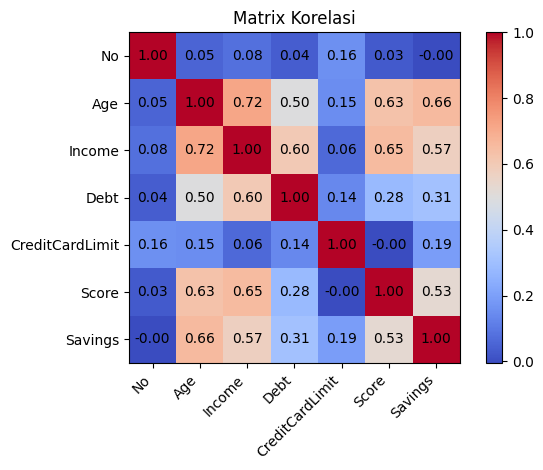

In [ ]:
plt.imshow(korelasi, cmap='coolwarm')
plt.colorbar()

plt.xticks(range(len(korelasi.columns)), korelasi.columns, rotation=45, ha='right')
plt.yticks(range(len(korelasi.columns)), korelasi.columns)

for i in range(len(korelasi)):
    for j in range(len(korelasi)):
        plt.text(j, i, f"{korelasi.iloc[i, j]:.2f}", ha='center', va='center')


plt.title("Matrix Korelasi")
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import ttest_ind

In [ ]:
hasil = []

numerik = df.select_dtypes(include=['int64','float64']).columns

for col in numerik:
    grup_no = df[df['Approved'] == "No"][col]
    grup_yes = df[df['Approved'] == "Yes"][col]

    t_stat, p_val = ttest_ind( grup_no,grup_yes, equal_var=False)

    hasil.append([col, t_stat, p_val])

pd.DataFrame(hasil, columns=['Kolom', 't_stat', 'p_value'])




,Kolom,t_stat,p_value
0,No,0.288988,0.773944
1,Age,-3.042587,0.003706
2,Income,-4.169444,0.000114
3,Debt,-1.501933,0.140215
4,CreditCardLimit,-1.197617,0.236210
5,Score,-4.806028,0.000019
6,Savings,-3.052312,0.003444


In [ ]:
from scipy.stats import ttest_ind, t
import pandas as pd
import numpy as np

grup_no = df[df['Approved'] == "No"]
grup_yes = df[df['Approved'] == "Yes"]

numerik = df.select_dtypes(include=['int64', 'float64']).columns

hasil = []

alpha_one_tail = 0.05
alpha_two_tail = 0.05

for col in numerik:
    data_no = grup_no[col].dropna()
    data_yes = grup_yes[col].dropna()

    t_stat, p_val_two_tail = ttest_ind(data_no, data_yes, equal_var=False)

    if t_stat < 0:
        p_val_one_tail = p_val_two_tail / 2
    else:
        p_val_one_tail = 1 - (p_val_two_tail / 2)

    n1, n2 = len(data_no), len(data_yes)
    var1, var2 = np.var(data_no, ddof=1), np.var(data_yes, ddof=1)

    df_welch = ((var1/n1 + var2/n2)**2) / \
               ((var1/n1)**2/(n1-1) + (var2/n2)**2/(n2-1))

    t_critical_one_tail = t.ppf(1 - alpha_one_tail, df_welch)
    t_critical_two_tail = t.ppf(1 - alpha_two_tail/2, df_welch)

    hasil.append([
        col,
        t_stat,
        p_val_one_tail,
        t_critical_one_tail,
        p_val_two_tail,
        t_critical_two_tail,
        df_welch
    ])

hasil_df = pd.DataFrame(hasil, columns=[
    'Kolom',
    't-Stat',
    'P(T<=t) one-tail',
    't-Critical one-tail',
    'P(T<=t) two-tail',
    't-Critical two-tail',
    'df'
])

pd.set_option('display.float_format', '{:.10f}'.format)
print(hasil_df)

             Kolom        t-Stat  P(T<=t) one-tail  t-Critical one-tail  \
0               No  0.2889877399      0.6130278113         1.6801332326   
1              Age -3.0425865653      0.0018531496         1.6753897880   
2           Income -4.1694439901      0.0000570643         1.6742580508   
3             Debt -1.5019330429      0.0701076642         1.6800147802   
4  CreditCardLimit -1.1976168290      0.1181049226         1.6730769236   
5            Score -4.8060284042      0.0000097087         1.6814361523   
6          Savings -3.0523124772      0.0017219297         1.6719799927   

   P(T<=t) two-tail  t-Critical two-tail            df  
0      0.7739443775         2.0152151710 44.1181292529  
1      0.0037062991         2.0077486596 50.8280750851  
2      0.0001141285         2.0059689568 52.7488412703  
3      0.1402153285         2.0150285763 44.2636506426  
4      0.2362098452         2.0041122974 54.9176914111  
5      0.0000194173         2.0172681049 42.5796478926  


In [ ]:
from scipy.stats import ttest_ind, t
import pandas as pd
import numpy as np


variables_to_test = ['Age', 'Debt', 'Score', 'Income', 'CreditCardLimit', 'Savings']

variables = [var for var in variables_to_test if var in df.columns]

hasil = []

alpha = 0.05

for col in variables:

    data_no = df[df['Approved'] == "No"][col].dropna()
    data_yes = df[df['Approved'] == "Yes"][col].dropna()

    mean_no = np.mean(data_no)
    mean_yes = np.mean(data_yes)
    var_no = np.var(data_no, ddof=1)
    var_yes = np.var(data_yes, ddof=1)
    n_no = len(data_no)
    n_yes = len(data_yes)

    t_stat, p_val_two_tail = ttest_ind(data_no, data_yes, equal_var=False)

    p_val_one_tail = t.cdf(t_stat, df=min(n_no-1, n_yes-1))

    numerator = (var_no/n_no + var_yes/n_yes)**2
    denominator = ((var_no/n_no)**2/(n_no-1)) + ((var_yes/n_yes)**2/(n_yes-1))
    df_welch = numerator / denominator


    t_critical_one_tail = t.ppf(1 - alpha, df_welch)
    t_critical_two_tail = t.ppf(1 - alpha/2, df_welch)

    hasil.append([
        col,
        mean_no,
        mean_yes,
        var_no,
        var_yes,
        n_no,
        n_yes,
        t_stat,
        p_val_one_tail,
        t_critical_one_tail,
        p_val_two_tail,
        t_critical_two_tail,
        df_welch
    ])


hasil_df = pd.DataFrame(hasil, columns=[
    'Variable',
    'Mean_No',
    'Mean_Yes',
    'Variance_No',
    'Variance_Yes',
    'Obs_No',
    'Obs_Yes',
    't-Stat',
    'P(T<=t) one-tail',
    't-Critical one-tail',
    'P(T<=t) two-tail',
    't-Critical two-tail',
    'df'
])

pd.set_option('display.float_format', '{:.8f}'.format)
print("Variable 1 = Approved (No), Variable 2 = Approved (Yes)")
print("=" * 80)

for index, row in hasil_df.iterrows():
    print(f"\nt-Test: Two-Sample Assuming Unequal Variances ({row['Variable']})")
    print(f"{'-'*60}")
    print(f"{'':<25} {'Variable 1':<20} {'Variable 2':<20}")
    print(f"{'Mean':<25} {row['Mean_No']:<20.8f} {row['Mean_Yes']:<20.8f}")
    print(f"{'Variance':<25} {row['Variance_No']:<20.8f} {row['Variance_Yes']:<20.8f}")
    print(f"{'Observations':<25} {row['Obs_No']:<20} {row['Obs_Yes']:<20}")
    print(f"{'Hypothesized Mean Difference':<25} 0")
    print(f"{'df':<25} {row['df']:<20.2f}")
    print(f"{'t-Stat':<25} {row['t-Stat']:<20.9f}")
    print(f"{'P(T<=t) one-tail':<25} {row['P(T<=t) one-tail']:<20.9f}")
    print(f"{'t-Critical one-tail':<25} {row['t-Critical one-tail']:<20.9f}")
    print(f"{'P(T<=t) two-tail':<25} {row['P(T<=t) two-tail']:<20.9f}")
    print(f"{'t-Critical two-tail':<25} {row['t-Critical two-tail']:<20.9f}")
    print()

Variable 1 = Approved (No), Variable 2 = Approved (Yes)

t-Test: Two-Sample Assuming Unequal Variances (Age)
------------------------------------------------------------
                          Variable 1           Variable 2          
Mean                      35.52173913          42.35135135         
Variance                  65.07905138          81.73423423         
Observations              23                   37                  
Hypothesized Mean Difference 0
df                        50.83               
t-Stat                    -3.042586565        
P(T<=t) one-tail          0.002986861         
t-Critical one-tail       1.675389788         
P(T<=t) two-tail          0.003706299         
t-Critical two-tail       2.007748660         


t-Test: Two-Sample Assuming Unequal Variances (Debt)
------------------------------------------------------------
                          Variable 1           Variable 2          
Mean                      2.40869565           2.83513514    

In [ ]:
from scipy.stats import ttest_ind
import pandas as pd

variables = ['Age', 'Debt', 'Score', 'Income', 'CreditCardLimit', 'Savings']

hasil_simple = []

for col in variables:
    if col in df.columns:
        grup_no = df[df['Approved'] == "No"][col]
        grup_yes = df[df['Approved'] == "Yes"][col]

        t_stat, p_val = ttest_ind(grup_no, grup_yes, equal_var=False)

        p_val_one_tail = p_val / 2

        hasil_simple.append([col, t_stat, p_val_one_tail, p_val])

result_df = pd.DataFrame(hasil_simple,
                        columns=['Variable', 't-Stat', 'P(T<=t) one-tail', 'P(T<=t) two-tail'])

pd.set_option('display.float_format', '{:.10f}'.format)
print(result_df)

          Variable        t-Stat  P(T<=t) one-tail  P(T<=t) two-tail
0              Age -3.0425865653      0.0018531496      0.0037062991
1             Debt -1.5019330429      0.0701076642      0.1402153285
2            Score -4.8060284042      0.0000097087      0.0000194173
3           Income -4.1694439901      0.0000570643      0.0001141285
4  CreditCardLimit -1.1976168290      0.1181049226      0.2362098452
5          Savings -3.0523124772      0.0017219297      0.0034438594


In [ ]:
# group_no = df[df['Approved'] == "No"]
# group_yes = df[df['Approved'] == "Yes"]

# numerik = df.select_dtypes(include=['int64', 'float64']).columns

# hasil = []

# for col in numerik:

#     data_no = group_no[col].dropna()
#     data_yes = group_yes[col].dropna()
#     t_stat, p_val = ttest_ind(data_no, data_yes, equal_var=False)

#     hasil.append([col, t_stat, p_val])

# hasil_df = pd.DataFrame(hasil, columns=['Kolom', 't_stat', 'p_value_two_tail'])
# print(hasil_df)

             Kolom    t_stat  p_value_two_tail
0               No  0.288988          0.773944
1              Age -3.042587          0.003706
2           Income -4.169444          0.000114
3             Debt -1.501933          0.140215
4  CreditCardLimit -1.197617          0.236210
5            Score -4.806028          0.000019
6          Savings -3.052312          0.003444


In [ ]:
from scipy import stats

kategori_cols = df.select_dtypes(include=['object', 'category']).columns
kategori_cols = [c for c in kategori_cols if c != 'Approved']

for col in kategori_cols:
    print(f"\n ==ANALISIS VARIABEL: {col.upper()} ==")

    obs = pd.crosstab(df['Approved'], df[col])

    chi2, p, dof, expected = stats.chi2_contingency(obs)

    expected_df = pd.DataFrame(expected,
                               index=obs.index,
                               columns=obs.columns)

    print("\n[A] TABEL OBSERVASI (Data Nyata):")
    print(obs)

    print("\n[B] TABEL EKSPEKTASI (Teoritis):")
    print(expected_df.round(2))

    print("\n[C] HASIL UJI STATISTIK:")
    print(f"   - Chi-Square Statistic : {chi2:.4f}")
    print(f"   - Degrees of Freedom   : {dof}")
    print(f"   - P-Value              : {p:.6f}")

    if p < 0.05:
        print("   -> KESIMPULAN: **Signifikan. Ada hubungan antara variabel.**")
    else:
        print("   -> KESIMPULAN: Tidak signifikan. Tidak ada hubungan kuat.")
        print("      (Perbedaan data nyata dan ekspektasi kemungkinan hanya kebetulan)")


 ==ANALISIS VARIABEL: JOBTYPE ==

[A] TABEL OBSERVASI (Data Nyata):
JobType   Contract  Permanent  Self-Employed
Approved                                    
No              11          9              3
Yes              4         30              3

[B] TABEL EKSPEKTASI (Teoritis):
JobType   Contract  Permanent  Self-Employed
Approved                                    
No            5.75      14.95            2.3
Yes           9.25      24.05            3.7

[C] HASIL UJI STATISTIK:
   - Chi-Square Statistic : 11.9588
   - Degrees of Freedom   : 2
   - P-Value              : 0.002530
   -> KESIMPULAN: **Signifikan. Ada hubungan antara variabel.**

 ==ANALISIS VARIABEL: MARITAL ==

[A] TABEL OBSERVASI (Data Nyata):
Marital   Married  Single
Approved                 
No             11      12
Yes            27      10

[B] TABEL EKSPEKTASI (Teoritis):
Marital   Married  Single
Approved                 
No          14.57    8.43
Yes         23.43   13.57

[C] HASIL UJI STATISTIK:
   - Ch

In [ ]:
from scipy import stats
import pandas as pd

kategori_cols = df.select_dtypes(include=['object', 'category']).columns
kategori_cols = [c for c in kategori_cols if c != 'Approved']

for col in kategori_cols:
    print(f"\n{'='*50}")
    print(f"ANALISIS VARIABEL: {col.upper()}")
    print(f"{'='*50}")

    obs = pd.crosstab(df[col], df['Approved'])


    chi2, p, dof, expected = stats.chi2_contingency(obs, correction=False)


    expected_df = pd.DataFrame(
        expected,
        index=obs.index,
        columns=obs.columns
    ).round(2)


    print("\n[A] TABEL OBSERVASI (Data Nyata):")
    obs_with_total = obs.copy()
    obs_with_total['Grand Total'] = obs_with_total.sum(axis=1)
    obs_with_total.loc['Grand Total'] = obs_with_total.sum(axis=0)
    print(obs_with_total)


    print("\n[B] TABEL EKSPEKTASI (Teoritis):")
    print(expected_df)


    print("\n[C] HASIL UJI STATISTIK:")
    print(f"   - Chi-Square Statistic : {chi2:.6f}")
    print(f"   - Degrees of Freedom   : {dof}")
    print(f"   - P-Value              : {p:.9f}")

    if p < 0.05:
        print(f"   -> KESIMPULAN: **Signifikan** (p = {p:.9f})")
    else:
        print(f"   -> KESIMPULAN: Tidak signifikan (p = {p:.9f})")


ANALISIS VARIABEL: JOBTYPE

[A] TABEL OBSERVASI (Data Nyata):
Approved       No  Yes  Grand Total
JobType                            
Contract       11    4           15
Permanent       9   30           39
Self-Employed   3    3            6
Grand Total    23   37           60

[B] TABEL EKSPEKTASI (Teoritis):
Approved          No    Yes
JobType                    
Contract        5.75   9.25
Permanent      14.95  24.05
Self-Employed   2.30   3.70

[C] HASIL UJI STATISTIK:
   - Chi-Square Statistic : 11.958782
   - Degrees of Freedom   : 2
   - P-Value              : 0.002530367
   -> KESIMPULAN: **Signifikan** (p = 0.002530367)

ANALISIS VARIABEL: MARITAL

[A] TABEL OBSERVASI (Data Nyata):
Approved     No  Yes  Grand Total
Marital                          
Married      11   27           38
Single       12   10           22
Grand Total  23   37           60

[B] TABEL EKSPEKTASI (Teoritis):
Approved     No    Yes
Marital               
Married   14.57  23.43
Single     8.43  13.57

[C